In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 800)

In [7]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df).sort_values(by="Ratio", ascending=False)
    return missing_df


def check_df(dataframe, head=5, tail=5):
    print("*" * 70)
    print(" Shape ".center(70, "*"))
    print("*" * 70)
    print(dataframe.shape)

    print("*" * 70)
    print(" Types ".center(70, "*"))
    print("*" * 70)
    print(dataframe.dtypes)

    print("*" * 70)
    print(" Head ".center(70, "*"))
    print("*" * 70)
    print(dataframe.head(head))

    print("*" * 70)
    print(" Tail ".center(70, "*"))
    print("*" * 70)
    print(dataframe.tail(tail))

    print("*" * 70)
    print(" NA ".center(70, "*"))
    print("*" * 70)
    print(missing_values_analysis(dataframe))

    print("*" * 70)
    print(" Quantiles ".center(70, "*"))
    print("*" * 70)
    print(dataframe.describe([.01, .05, .1, .5, .9, .95, .99]).T)

    print("*" * 70)
    print(" Duplicate Rows ".center(70, "*"))
    print("*" * 70)
    print(dataframe.duplicated().sum())

    print("*" * 70)
    print(" Uniques ".center(70, "*"))
    print("*" * 70)
    print(dataframe.nunique())

In [2]:
train = pd.read_csv("./data/train.csv").iloc[:,1:]
test = pd.read_csv("./data/test_x.csv").iloc[:,1:]

In [9]:
test.head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi
0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,365331.930346,Köy veya Kasaba,Giyim,5566.587664,15.442635,Etmiyor,19.646460
1,Erkek,41-50,Bekar,Lise Mezunu,İşsiz veya Düzenli Bir İşi Yok,414899.236174,Büyük Şehir,Spor Malzemeleri,6756.766203,14.957246,Etmiyor,19.675863
2,Kadın,>60,Evli,Eğitimsiz,İşsiz veya Düzenli Bir İşi Yok,152825.872271,Küçük Şehir,Giyim,4493.915682,10.907930,Etmiyor,46.904518
3,Kadın,51-60,Evli,Doktora Ötesi,Düzenli ve Ücretli Bir İşi Var,489052.908472,Köy veya Kasaba,Kozmetik,42670.646595,32.333021,Etmiyor,48.083609
4,Erkek,18-30,Evli,Yüksek Lisans Mezunu,Kendi İşinin Sahibi,323635.711534,Küçük Şehir,Giyim,5959.266948,4.519968,Etmiyor,12.752491


## Feature Engineering Ideas:
- Medeni durum-Eğitim düzeyi ikilisi
- Medeni durum-İstihdam Durumu ikilisi
- İstihdam Durumu-Eğitim düzeyi ikilisi
- Eğitim düzeyi-Eğitime devam etme durumu

In [3]:

# Ürün Başına Ortalama Fiyat
train['Ürün Başına Ortalama Fiyat'] = train['Yıllık Ortalama Gelir'] / train['Yıllık Ortalama Satın Alım Miktarı']

# Sipariş Başına Ortalama Ürün Adedi
train['Sipariş Başına Ortalama Ürün Adedi'] = train['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] / train['Yıllık Ortalama Satın Alım Miktarı']

# Sepet Başına Ortalama Ürün Adedi
train['Sepet Başına Ortalama Ürün Adedi'] = train['Yıllık Ortalama Sepete Atılan Ürün Adedi'] / train['Yıllık Ortalama Satın Alım Miktarı']

# Sepet Dönüşüm Oranı
train['Sepet Dönüşüm Oranı'] = train['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] / train['Yıllık Ortalama Sepete Atılan Ürün Adedi']

# Toplam Sepet İçeriği Değeri
train['Toplam Sepet İçeriği Değeri'] = train['Yıllık Ortalama Sepete Atılan Ürün Adedi'] * train['Ürün Başına Ortalama Fiyat']



In [4]:
# Gelir ve Miktar Oranı
train['Gelir ve Miktar Oranı'] = train['Yıllık Ortalama Gelir'] / train['Yıllık Ortalama Satın Alım Miktarı']

# Ürün Adetlerinin Oranı
train['Ürün Adetlerinin Oranı'] = train['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] / train['Yıllık Ortalama Sepete Atılan Ürün Adedi']

# Gelir ve Ürün Adeti Oranı
train['Gelir ve Ürün Adeti Oranı'] = train['Yıllık Ortalama Gelir'] / train['Yıllık Ortalama Sipariş Verilen Ürün Adedi']

# Sepet Ortalama Değer
train['Sepet Ortalama Değer'] = train['Toplam Sepet İçeriği Değeri'] / train['Yıllık Ortalama Sipariş Verilen Ürün Adedi']

# Gelir ve Sepet Dönüşüm Oranı
train['Gelir ve Sepet Dönüşüm Oranı'] = train['Yıllık Ortalama Gelir'] / train['Sepet Dönüşüm Oranı']

# Ortalama Gelir ve Ürün Başına Ortalama Fiyat Oranı
train['Ortalama Gelir ve Ürün Başına Ortalama Fiyat Oranı'] = train['Yıllık Ortalama Gelir'] / train['Ürün Başına Ortalama Fiyat']

# Ortalama Sipariş Verilen Ürün Adedi ve Sepet Başına Ortalama Ürün Adedi Oranı
train['Ortalama Sipariş Verilen Ürün Adedi ve Sepet Başına Ortalama Ürün Adedi Oranı'] = train['Sipariş Başına Ortalama Ürün Adedi'] / train['Sepet Başına Ortalama Ürün Adedi']



In [5]:

# Ürün Başına Ortalama Fiyat
test['Ürün Başına Ortalama Fiyat'] = test['Yıllık Ortalama Gelir'] / test['Yıllık Ortalama Satın Alım Miktarı']

# Sipariş Başına Ortalama Ürün Adedi
test['Sipariş Başına Ortalama Ürün Adedi'] = test['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] / test['Yıllık Ortalama Satın Alım Miktarı']

# Sepet Başına Ortalama Ürün Adedi
test['Sepet Başına Ortalama Ürün Adedi'] = test['Yıllık Ortalama Sepete Atılan Ürün Adedi'] / test['Yıllık Ortalama Satın Alım Miktarı']

# Sepet Dönüşüm Oranı
test['Sepet Dönüşüm Oranı'] = test['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] / test['Yıllık Ortalama Sepete Atılan Ürün Adedi']

# Toplam Sepet İçeriği Değeri
test['Toplam Sepet İçeriği Değeri'] = test['Yıllık Ortalama Sepete Atılan Ürün Adedi'] * test['Ürün Başına Ortalama Fiyat']



In [6]:
# Gelir ve Miktar Oranı
test['Gelir ve Miktar Oranı'] = test['Yıllık Ortalama Gelir'] / test['Yıllık Ortalama Satın Alım Miktarı']

# Ürün Adetlerinin Oranı
test['Ürün Adetlerinin Oranı'] = test['Yıllık Ortalama Sipariş Verilen Ürün Adedi'] / test['Yıllık Ortalama Sepete Atılan Ürün Adedi']

# Gelir ve Ürün Adeti Oranı
test['Gelir ve Ürün Adeti Oranı'] = test['Yıllık Ortalama Gelir'] / test['Yıllık Ortalama Sipariş Verilen Ürün Adedi']

# Sepet Ortalama Değer
test['Sepet Ortalama Değer'] = test['Toplam Sepet İçeriği Değeri'] / test['Yıllık Ortalama Sipariş Verilen Ürün Adedi']

# Gelir ve Sepet Dönüşüm Oranı
test['Gelir ve Sepet Dönüşüm Oranı'] = test['Yıllık Ortalama Gelir'] / test['Sepet Dönüşüm Oranı']

# Ortalama Gelir ve Ürün Başına Ortalama Fiyat Oranı
test['Ortalama Gelir ve Ürün Başına Ortalama Fiyat Oranı'] = test['Yıllık Ortalama Gelir'] / test['Ürün Başına Ortalama Fiyat']

# Ortalama Sipariş Verilen Ürün Adedi ve Sepet Başına Ortalama Ürün Adedi Oranı
test['Ortalama Sipariş Verilen Ürün Adedi ve Sepet Başına Ortalama Ürün Adedi Oranı'] = test['Sipariş Başına Ortalama Ürün Adedi'] / test['Sepet Başına Ortalama Ürün Adedi']



In [7]:
from itertools import combinations

categorical_columns = ['Cinsiyet', 'Yaş Grubu', 'Medeni Durum', 'Eğitim Düzeyi', 'İstihdam Durumu', 'Yaşadığı Şehir', 'En Çok İlgilendiği Ürün Grubu', 'Eğitime Devam Etme Durumu']


# Generate all possible binary combinations of categorical columns
pairs_list = list(combinations(categorical_columns, 2))

# Create new columns by combining the selected pairs of categorical columns
for pair in pairs_list:
    new_col_name = ' - '.join(pair)
    train[new_col_name] = train[list(pair)].apply(lambda x: ' - '.join(x), axis=1)


In [12]:
train.head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet - Yaş Grubu,Cinsiyet - Medeni Durum,Cinsiyet - Eğitim Düzeyi,Cinsiyet - İstihdam Durumu,Cinsiyet - Yaşadığı Şehir,Cinsiyet - En Çok İlgilendiği Ürün Grubu,Cinsiyet - Eğitime Devam Etme Durumu,Yaş Grubu - Medeni Durum,Yaş Grubu - Eğitim Düzeyi,Yaş Grubu - İstihdam Durumu,Yaş Grubu - Yaşadığı Şehir,Yaş Grubu - En Çok İlgilendiği Ürün Grubu,Yaş Grubu - Eğitime Devam Etme Durumu,Medeni Durum - Eğitim Düzeyi,Medeni Durum - İstihdam Durumu,Medeni Durum - Yaşadığı Şehir,Medeni Durum - En Çok İlgilendiği Ürün Grubu,Medeni Durum - Eğitime Devam Etme Durumu,Eğitim Düzeyi - İstihdam Durumu,Eğitim Düzeyi - Yaşadığı Şehir,Eğitim Düzeyi - En Çok İlgilendiği Ürün Grubu,Eğitim Düzeyi - Eğitime Devam Etme Durumu,İstihdam Durumu - Yaşadığı Şehir,İstihdam Durumu - En Çok İlgilendiği Ürün Grubu,İstihdam Durumu - Eğitime Devam Etme Durumu,Yaşadığı Şehir - En Çok İlgilendiği Ürün Grubu,Yaşadığı Şehir - Eğitime Devam Etme Durumu,En Çok İlgilendiği Ürün Grubu - Eğitime Devam Etme Durumu
0,Kadın,31-40,Bekar,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,748266.440879,Büyük Şehir,Elektronik ve Teknolojik Ürünler,32010.900881,37.310644,Etmiyor,obek_4,102.936904,Kadın - 31-40,Kadın - Bekar,Kadın - Yüksek Lisans Mezunu,Kadın - Düzenli ve Ücretli Bir İşi Var,Kadın - Büyük Şehir,Kadın - Elektronik ve Teknolojik Ürünler,Kadın - Etmiyor,31-40 - Bekar,31-40 - Yüksek Lisans Mezunu,31-40 - Düzenli ve Ücretli Bir İşi Var,31-40 - Büyük Şehir,31-40 - Elektronik ve Teknolojik Ürünler,31-40 - Etmiyor,Bekar - Yüksek Lisans Mezunu,Bekar - Düzenli ve Ücretli Bir İşi Var,Bekar - Büyük Şehir,Bekar - Elektronik ve Teknolojik Ürünler,Bekar - Etmiyor,Yüksek Lisans Mezunu - Düzenli ve Ücretli Bir ...,Yüksek Lisans Mezunu - Büyük Şehir,Yüksek Lisans Mezunu - Elektronik ve Teknoloji...,Yüksek Lisans Mezunu - Etmiyor,Düzenli ve Ücretli Bir İşi Var - Büyük Şehir,Düzenli ve Ücretli Bir İşi Var - Elektronik ve...,Düzenli ve Ücretli Bir İşi Var - Etmiyor,Büyük Şehir - Elektronik ve Teknolojik Ürünler,Büyük Şehir - Etmiyor,Elektronik ve Teknolojik Ürünler - Etmiyor
1,Erkek,>60,Evli,Lise Mezunu,Kendi İşinin Sahibi,246298.609605,Küçük Şehir,Spor Malzemeleri,4145.729891,11.554851,Etmiyor,obek_5,82.176053,Erkek - >60,Erkek - Evli,Erkek - Lise Mezunu,Erkek - Kendi İşinin Sahibi,Erkek - Küçük Şehir,Erkek - Spor Malzemeleri,Erkek - Etmiyor,>60 - Evli,>60 - Lise Mezunu,>60 - Kendi İşinin Sahibi,>60 - Küçük Şehir,>60 - Spor Malzemeleri,>60 - Etmiyor,Evli - Lise Mezunu,Evli - Kendi İşinin Sahibi,Evli - Küçük Şehir,Evli - Spor Malzemeleri,Evli - Etmiyor,Lise Mezunu - Kendi İşinin Sahibi,Lise Mezunu - Küçük Şehir,Lise Mezunu - Spor Malzemeleri,Lise Mezunu - Etmiyor,Kendi İşinin Sahibi - Küçük Şehir,Kendi İşinin Sahibi - Spor Malzemeleri,Kendi İşinin Sahibi - Etmiyor,Küçük Şehir - Spor Malzemeleri,Küçük Şehir - Etmiyor,Spor Malzemeleri - Etmiyor
2,Erkek,18-30,Bekar,Lise Mezunu,Düzenli ve Ücretli Bir İşi Var,268582.732360,Küçük Şehir,Giyim,9924.379414,55.353236,Ediyor,obek_8,141.661426,Erkek - 18-30,Erkek - Bekar,Erkek - Lise Mezunu,Erkek - Düzenli ve Ücretli Bir İşi Var,Erkek - Küçük Şehir,Erkek - Giyim,Erkek - Ediyor,18-30 - Bekar,18-30 - Lise Mezunu,18-30 - Düzenli ve Ücretli Bir İşi Var,18-30 - Küçük Şehir,18-30 - Giyim,18-30 - Ediyor,Bekar - Lise Mezunu,Bekar - Düzenli ve Ücretli Bir İşi Var,Bekar - Küçük Şehir,Bekar - Giyim,Bekar - Ediyor,Lise Mezunu - Düzenli ve Ücretli Bir İşi Var,Lise Mezunu - Küçük Şehir,Lise Mezunu - Giyim,Lise Mezunu - Ediyor,Düzenli ve Ücretli Bir İşi Var - Küçük Şehir,Düzenli ve Ücretli Bir İşi Var - Giyim,Düzenli ve Ücretli Bir İşi Var - Ediyor,Küçük Şehir - Giyim,Küçük Şehir - Ediyor,Giyim - Ediyor
3,Erkek,51-60,Evli,Lise Mezunu,Kendi İşinin Sahibi,327721.837865,Kırsal,Gi

In [12]:
train.head()

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet - Yaş Grubu,Cinsiyet - Medeni Durum,Cinsiyet - Eğitim Düzeyi,Cinsiyet - İstihdam Durumu,Cinsiyet - Yaşadığı Şehir,Cinsiyet - En Çok İlgilendiği Ürün Grubu,Cinsiyet - Eğitime Devam Etme Durumu,Yaş Grubu - Medeni Durum,Yaş Grubu - Eğitim Düzeyi,Yaş Grubu - İstihdam Durumu,Yaş Grubu - Yaşadığı Şehir,Yaş Grubu - En Çok İlgilendiği Ürün Grubu,Yaş Grubu - Eğitime Devam Etme Durumu,Medeni Durum - Eğitim Düzeyi,Medeni Durum - İstihdam Durumu,Medeni Durum - Yaşadığı Şehir,Medeni Durum - En Çok İlgilendiği Ürün Grubu,Medeni Durum - Eğitime Devam Etme Durumu,Eğitim Düzeyi - İstihdam Durumu,Eğitim Düzeyi - Yaşadığı Şehir,Eğitim Düzeyi - En Çok İlgilendiği Ürün Grubu,Eğitim Düzeyi - Eğitime Devam Etme Durumu,İstihdam Durumu - Yaşadığı Şehir,İstihdam Durumu - En Çok İlgilendiği Ürün Grubu,İstihdam Durumu - Eğitime Devam Etme Durumu,Yaşadığı Şehir - En Çok İlgilendiği Ürün Grubu,Yaşadığı Şehir - Eğitime Devam Etme Durumu,En Çok İlgilendiği Ürün Grubu - Eğitime Devam Etme Durumu,Cinsiyet - Yaş Grubu - Medeni Durum,Cinsiyet - Yaş Grubu - Eğitim Düzeyi,Cinsiyet - Yaş Grubu - İstihdam Durumu,Cinsiyet - Yaş Grubu - Yaşadığı Şehir,Cinsiyet - Yaş Grubu - En Çok İlgilendiği Ürün Grubu,Cinsiyet - Yaş Grubu - Eğitime Devam Etme Durumu,Cinsiyet - Medeni Durum - Eğitim Düzeyi,Cinsiyet - Medeni Durum - İstihdam Durumu,Cinsiyet - Medeni Durum - Yaşadığı Şehir,Cinsiyet - Medeni Durum - En Çok İlgilendiği Ürün Grubu,Cinsiyet - Medeni Durum - Eğitime Devam Etme Durumu,Cinsiyet - Eğitim Düzeyi - İstihdam Durumu,Cinsiyet - Eğitim Düzeyi - Yaşadığı Şehir,Cinsiyet - Eğitim Düzeyi - En Çok İlgilendiği Ürün Grubu,Cinsiyet - Eğitim Düzeyi - Eğitime Devam Etme Durumu,Cinsiyet - İstihdam Durumu - Yaşadığı Şehir,Cinsiyet - İstihdam Durumu - En Çok İlgilendiği Ürün Grubu,Cinsiyet - İstihdam Durumu - Eğitime Devam Etme Durumu,Cinsiyet - Yaşadığı Şehir - En Çok İlgilendiği Ürün Grubu,Cinsiyet - Yaşadığı Şehir - Eğitime Devam Etme Durumu,Cinsiyet - En Çok İlgilendiği Ürün Grubu - Eğitime Devam Etme Durumu,Yaş Grubu - Medeni Durum - Eğitim Düzeyi,Yaş Grubu - Medeni Durum - İstihdam Durumu,Yaş Grubu - Medeni Durum - Yaşadığı Şehir,Yaş Grubu - Medeni Durum - En Çok İlgilendiği Ürün Grubu,Yaş Grubu - Medeni Durum - Eğitime Devam Etme Durumu,Yaş Grubu - Eğitim Düzeyi - İstihdam Durumu,Yaş Grubu - Eğitim Düzeyi - Yaşadığı Şehir,Yaş Grubu - Eğitim Düzeyi - En Çok İlgilendiği Ürün Grubu,Yaş Grubu - Eğitim Düzeyi - Eğitime Devam Etme Durumu,Yaş Grubu - İstihdam Durumu - Yaşadığı Şehir,Yaş Grubu - İstihdam Durumu - En Çok İlgilendiği Ürün Grubu,Yaş Grubu - İstihdam Durumu - Eğitime Devam Etme Durumu,Yaş Grubu - Yaşadığı Şehir - En Çok İlgilendiği Ürün Grubu,Yaş Grubu - Yaşadığı Şehir - Eğitime Devam Etme Durumu,Yaş Grubu - En Çok İlgilendiği Ürün Grubu - Eğitime Devam Etme Durumu,Medeni Durum - Eğitim Düzeyi - İstihdam Durumu,Medeni Durum - Eğitim Düzeyi - Yaşadığı Şehir,Medeni Durum - Eğitim Düzeyi - En Çok İlgilendiği Ürün Grubu,Medeni Durum - Eğitim Düzeyi - Eğitime Devam Etme Durumu,Medeni Durum - İstihdam Durumu - Yaşadığı Şehir,Medeni Durum - İstihdam Durumu - En Çok İlgilendiği Ürün Grubu,Medeni Durum - İstihdam Durumu - Eğitime Devam Etme Durumu,Medeni Durum - Yaşadığı Şehir - En Çok İlgilendiği Ürün Grubu,Medeni Durum - Yaşadığı Şehir - Eğitime Devam Etme Durumu,Medeni Durum - En Çok İlgilendiği Ürün Grubu - Eğitime Devam Etme Durumu,Eğitim Düzeyi - İstihdam Durumu - Yaşadığı Şehir,Eğitim Düzeyi - İstihdam Durumu - En Çok İlgilendiği Ürün Grubu,Eğitim Düzeyi - İstihdam Durumu - Eğitime Devam Etme Durumu,Eğitim Düzeyi - Yaşadığı Şehir - En Çok İlgilendiği Ürün Grubu,Eğitim Düzeyi - Yaşadığı Şehir - Eğitime Devam Etme Durumu,Eğitim Düzeyi - En Çok İlgilendiği Ürün Grubu - Eğitime Devam 

In [8]:
for pair in pairs_list:
    new_col_name = ' - '.join(pair)
    test[new_col_name] = test[list(pair)].apply(lambda x: ' - '.join(x), axis=1)

In [9]:
train.shape

(5460, 53)

In [10]:
test.shape

(2340, 52)

In [15]:
train.shape

(5460, 41)

In [14]:
test.shape

(2340, 40)

In [14]:
test.shape

(2340, 259)

In [15]:
train.shape

(5460, 260)

In [4]:
check_df(train)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(5460, 14)
**********************************************************************
******************************* Types ********************************
**********************************************************************
index                                           int64
Cinsiyet                                       object
Yaş Grubu                                      object
Medeni Durum                                   object
Eğitim Düzeyi                                  object
İstihdam Durumu                                object
Yıllık Ortalama Gelir                         float64
Yaşadığı Şehir                                 object
En Çok İlgilendiği Ürün Grubu                  object
Yıllık Ortalama Satın Alım Miktarı            float64
Yıllık Ortalama Sipariş

In [18]:
train.shape

(5460, 13)

In [19]:
test.shape

(2340, 12)

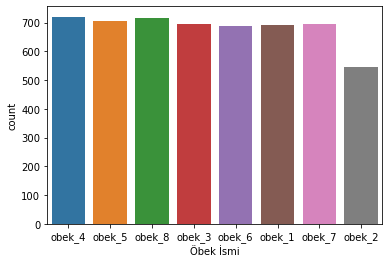

In [10]:
sns.countplot(x=train["Öbek İsmi"]);

In [11]:
app_train = train.copy()
app_test = test.copy()

In [38]:
train.head(1)

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Öbek İsmi,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet - Yaş Grubu,Cinsiyet - Medeni Durum,Cinsiyet - Eğitim Düzeyi,Cinsiyet - İstihdam Durumu,Cinsiyet - Yaşadığı Şehir,Cinsiyet - En Çok İlgilendiği Ürün Grubu,Cinsiyet - Eğitime Devam Etme Durumu,Yaş Grubu - Medeni Durum,Yaş Grubu - Eğitim Düzeyi,Yaş Grubu - İstihdam Durumu,Yaş Grubu - Yaşadığı Şehir,Yaş Grubu - En Çok İlgilendiği Ürün Grubu,Yaş Grubu - Eğitime Devam Etme Durumu,Medeni Durum - Eğitim Düzeyi,Medeni Durum - İstihdam Durumu,Medeni Durum - Yaşadığı Şehir,Medeni Durum - En Çok İlgilendiği Ürün Grubu,Medeni Durum - Eğitime Devam Etme Durumu,Eğitim Düzeyi - İstihdam Durumu,Eğitim Düzeyi - Yaşadığı Şehir,Eğitim Düzeyi - En Çok İlgilendiği Ürün Grubu,Eğitim Düzeyi - Eğitime Devam Etme Durumu,İstihdam Durumu - Yaşadığı Şehir,İstihdam Durumu - En Çok İlgilendiği Ürün Grubu,İstihdam Durumu - Eğitime Devam Etme Durumu,Yaşadığı Şehir - En Çok İlgilendiği Ürün Grubu,Yaşadığı Şehir - Eğitime Devam Etme Durumu,En Çok İlgilendiği Ürün Grubu - Eğitime Devam Etme Durumu,Cinsiyet - Yaş Grubu - Medeni Durum,Cinsiyet - Yaş Grubu - Eğitim Düzeyi,Cinsiyet - Yaş Grubu - İstihdam Durumu,Cinsiyet - Yaş Grubu - Yaşadığı Şehir,Cinsiyet - Yaş Grubu - En Çok İlgilendiği Ürün Grubu,Cinsiyet - Yaş Grubu - Eğitime Devam Etme Durumu,Cinsiyet - Medeni Durum - Eğitim Düzeyi,Cinsiyet - Medeni Durum - İstihdam Durumu,Cinsiyet - Medeni Durum - Yaşadığı Şehir,Cinsiyet - Medeni Durum - En Çok İlgilendiği Ürün Grubu,Cinsiyet - Medeni Durum - Eğitime Devam Etme Durumu,Cinsiyet - Eğitim Düzeyi - İstihdam Durumu,Cinsiyet - Eğitim Düzeyi - Yaşadığı Şehir,Cinsiyet - Eğitim Düzeyi - En Çok İlgilendiği Ürün Grubu,Cinsiyet - Eğitim Düzeyi - Eğitime Devam Etme Durumu,Cinsiyet - İstihdam Durumu - Yaşadığı Şehir,Cinsiyet - İstihdam Durumu - En Çok İlgilendiği Ürün Grubu,Cinsiyet - İstihdam Durumu - Eğitime Devam Etme Durumu,Cinsiyet - Yaşadığı Şehir - En Çok İlgilendiği Ürün Grubu,Cinsiyet - Yaşadığı Şehir - Eğitime Devam Etme Durumu,Cinsiyet - En Çok İlgilendiği Ürün Grubu - Eğitime Devam Etme Durumu,Yaş Grubu - Medeni Durum - Eğitim Düzeyi,Yaş Grubu - Medeni Durum - İstihdam Durumu,Yaş Grubu - Medeni Durum - Yaşadığı Şehir,Yaş Grubu - Medeni Durum - En Çok İlgilendiği Ürün Grubu,Yaş Grubu - Medeni Durum - Eğitime Devam Etme Durumu,Yaş Grubu - Eğitim Düzeyi - İstihdam Durumu,Yaş Grubu - Eğitim Düzeyi - Yaşadığı Şehir,Yaş Grubu - Eğitim Düzeyi - En Çok İlgilendiği Ürün Grubu,Yaş Grubu - Eğitim Düzeyi - Eğitime Devam Etme Durumu,Yaş Grubu - İstihdam Durumu - Yaşadığı Şehir,Yaş Grubu - İstihdam Durumu - En Çok İlgilendiği Ürün Grubu,Yaş Grubu - İstihdam Durumu - Eğitime Devam Etme Durumu,Yaş Grubu - Yaşadığı Şehir - En Çok İlgilendiği Ürün Grubu,Yaş Grubu - Yaşadığı Şehir - Eğitime Devam Etme Durumu,Yaş Grubu - En Çok İlgilendiği Ürün Grubu - Eğitime Devam Etme Durumu,Medeni Durum - Eğitim Düzeyi - İstihdam Durumu,Medeni Durum - Eğitim Düzeyi - Yaşadığı Şehir,Medeni Durum - Eğitim Düzeyi - En Çok İlgilendiği Ürün Grubu,Medeni Durum - Eğitim Düzeyi - Eğitime Devam Etme Durumu,Medeni Durum - İstihdam Durumu - Yaşadığı Şehir,Medeni Durum - İstihdam Durumu - En Çok İlgilendiği Ürün Grubu,Medeni Durum - İstihdam Durumu - Eğitime Devam Etme Durumu,Medeni Durum - Yaşadığı Şehir - En Çok İlgilendiği Ürün Grubu,Medeni Durum - Yaşadığı Şehir - Eğitime Devam Etme Durumu,Medeni Durum - En Çok İlgilendiği Ürün Grubu - Eğitime Devam Etme Durumu,Eğitim Düzeyi - İstihdam Durumu - Yaşadığı Şehir,Eğitim Düzeyi - İstihdam Durumu - En Çok İlgilendiği Ürün Grubu,Eğitim Düzeyi - İstihdam Durumu - Eğitime Devam Etme Durumu,Eğitim Düzeyi - Yaşadığı Şehir - En Çok İlgilendiği Ürün Grubu,Eğitim Düzeyi - Yaşadığı Şehir - Eğitime Devam Etme Durumu,Eğitim Düzeyi - En Çok İlgilendiği Ürün Grubu - Eğitime Devam 

In [39]:
test.head(1)

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi,Cinsiyet - Yaş Grubu,Cinsiyet - Medeni Durum,Cinsiyet - Eğitim Düzeyi,Cinsiyet - İstihdam Durumu,Cinsiyet - Yaşadığı Şehir,Cinsiyet - En Çok İlgilendiği Ürün Grubu,Cinsiyet - Eğitime Devam Etme Durumu,Yaş Grubu - Medeni Durum,Yaş Grubu - Eğitim Düzeyi,Yaş Grubu - İstihdam Durumu,Yaş Grubu - Yaşadığı Şehir,Yaş Grubu - En Çok İlgilendiği Ürün Grubu,Yaş Grubu - Eğitime Devam Etme Durumu,Medeni Durum - Eğitim Düzeyi,Medeni Durum - İstihdam Durumu,Medeni Durum - Yaşadığı Şehir,Medeni Durum - En Çok İlgilendiği Ürün Grubu,Medeni Durum - Eğitime Devam Etme Durumu,Eğitim Düzeyi - İstihdam Durumu,Eğitim Düzeyi - Yaşadığı Şehir,Eğitim Düzeyi - En Çok İlgilendiği Ürün Grubu,Eğitim Düzeyi - Eğitime Devam Etme Durumu,İstihdam Durumu - Yaşadığı Şehir,İstihdam Durumu - En Çok İlgilendiği Ürün Grubu,İstihdam Durumu - Eğitime Devam Etme Durumu,Yaşadığı Şehir - En Çok İlgilendiği Ürün Grubu,Yaşadığı Şehir - Eğitime Devam Etme Durumu,En Çok İlgilendiği Ürün Grubu - Eğitime Devam Etme Durumu,Cinsiyet - Yaş Grubu - Medeni Durum,Cinsiyet - Yaş Grubu - Eğitim Düzeyi,Cinsiyet - Yaş Grubu - İstihdam Durumu,Cinsiyet - Yaş Grubu - Yaşadığı Şehir,Cinsiyet - Yaş Grubu - En Çok İlgilendiği Ürün Grubu,Cinsiyet - Yaş Grubu - Eğitime Devam Etme Durumu,Cinsiyet - Medeni Durum - Eğitim Düzeyi,Cinsiyet - Medeni Durum - İstihdam Durumu,Cinsiyet - Medeni Durum - Yaşadığı Şehir,Cinsiyet - Medeni Durum - En Çok İlgilendiği Ürün Grubu,Cinsiyet - Medeni Durum - Eğitime Devam Etme Durumu,Cinsiyet - Eğitim Düzeyi - İstihdam Durumu,Cinsiyet - Eğitim Düzeyi - Yaşadığı Şehir,Cinsiyet - Eğitim Düzeyi - En Çok İlgilendiği Ürün Grubu,Cinsiyet - Eğitim Düzeyi - Eğitime Devam Etme Durumu,Cinsiyet - İstihdam Durumu - Yaşadığı Şehir,Cinsiyet - İstihdam Durumu - En Çok İlgilendiği Ürün Grubu,Cinsiyet - İstihdam Durumu - Eğitime Devam Etme Durumu,Cinsiyet - Yaşadığı Şehir - En Çok İlgilendiği Ürün Grubu,Cinsiyet - Yaşadığı Şehir - Eğitime Devam Etme Durumu,Cinsiyet - En Çok İlgilendiği Ürün Grubu - Eğitime Devam Etme Durumu,Yaş Grubu - Medeni Durum - Eğitim Düzeyi,Yaş Grubu - Medeni Durum - İstihdam Durumu,Yaş Grubu - Medeni Durum - Yaşadığı Şehir,Yaş Grubu - Medeni Durum - En Çok İlgilendiği Ürün Grubu,Yaş Grubu - Medeni Durum - Eğitime Devam Etme Durumu,Yaş Grubu - Eğitim Düzeyi - İstihdam Durumu,Yaş Grubu - Eğitim Düzeyi - Yaşadığı Şehir,Yaş Grubu - Eğitim Düzeyi - En Çok İlgilendiği Ürün Grubu,Yaş Grubu - Eğitim Düzeyi - Eğitime Devam Etme Durumu,Yaş Grubu - İstihdam Durumu - Yaşadığı Şehir,Yaş Grubu - İstihdam Durumu - En Çok İlgilendiği Ürün Grubu,Yaş Grubu - İstihdam Durumu - Eğitime Devam Etme Durumu,Yaş Grubu - Yaşadığı Şehir - En Çok İlgilendiği Ürün Grubu,Yaş Grubu - Yaşadığı Şehir - Eğitime Devam Etme Durumu,Yaş Grubu - En Çok İlgilendiği Ürün Grubu - Eğitime Devam Etme Durumu,Medeni Durum - Eğitim Düzeyi - İstihdam Durumu,Medeni Durum - Eğitim Düzeyi - Yaşadığı Şehir,Medeni Durum - Eğitim Düzeyi - En Çok İlgilendiği Ürün Grubu,Medeni Durum - Eğitim Düzeyi - Eğitime Devam Etme Durumu,Medeni Durum - İstihdam Durumu - Yaşadığı Şehir,Medeni Durum - İstihdam Durumu - En Çok İlgilendiği Ürün Grubu,Medeni Durum - İstihdam Durumu - Eğitime Devam Etme Durumu,Medeni Durum - Yaşadığı Şehir - En Çok İlgilendiği Ürün Grubu,Medeni Durum - Yaşadığı Şehir - Eğitime Devam Etme Durumu,Medeni Durum - En Çok İlgilendiği Ürün Grubu - Eğitime Devam Etme Durumu,Eğitim Düzeyi - İstihdam Durumu - Yaşadığı Şehir,Eğitim Düzeyi - İstihdam Durumu - En Çok İlgilendiği Ürün Grubu,Eğitim Düzeyi - İstihdam Durumu - Eğitime Devam Etme Durumu,Eğitim Düzeyi - Yaşadığı Şehir - En Çok İlgilendiği Ürün Grubu,Eğitim Düzeyi - Yaşadığı Şehir - Eğitime Devam Etme Durumu,Eğitim Düzeyi - En Çok İlgilendiği Ürün Grubu - Eğitime Devam Etme Durum

In [13]:
test.head(1)

,Cinsiyet,Yaş Grubu,Medeni Durum,Eğitim Düzeyi,İstihdam Durumu,Yıllık Ortalama Gelir,Yaşadığı Şehir,En Çok İlgilendiği Ürün Grubu,Yıllık Ortalama Satın Alım Miktarı,Yıllık Ortalama Sipariş Verilen Ürün Adedi,Eğitime Devam Etme Durumu,Yıllık Ortalama Sepete Atılan Ürün Adedi,Ürün Başına Ortalama Fiyat,Sipariş Başına Ortalama Ürün Adedi,Sepet Başına Ortalama Ürün Adedi,Sepet Dönüşüm Oranı,Toplam Sepet İçeriği Değeri,Gelir ve Miktar Oranı,Ürün Adetlerinin Oranı,Gelir ve Ürün Adeti Oranı,Sepet Ortalama Değer,Gelir ve Sepet Dönüşüm Oranı,Ortalama Gelir ve Ürün Başına Ortalama Fiyat Oranı,Ortalama Sipariş Verilen Ürün Adedi ve Sepet Başına Ortalama Ürün Adedi Oranı,Cinsiyet - Yaş Grubu,Cinsiyet - Medeni Durum,Cinsiyet - Eğitim Düzeyi,Cinsiyet - İstihdam Durumu,Cinsiyet - Yaşadığı Şehir,Cinsiyet - En Çok İlgilendiği Ürün Grubu,Cinsiyet - Eğitime Devam Etme Durumu,Yaş Grubu - Medeni Durum,Yaş Grubu - Eğitim Düzeyi,Yaş Grubu - İstihdam Durumu,Yaş Grubu - Yaşadığı Şehir,Yaş Grubu - En Çok İlgilendiği Ürün Grubu,Yaş Grubu - Eğitime Devam Etme Durumu,Medeni Durum - Eğitim Düzeyi,Medeni Durum - İstihdam Durumu,Medeni Durum - Yaşadığı Şehir,Medeni Durum - En Çok İlgilendiği Ürün Grubu,Medeni Durum - Eğitime Devam Etme Durumu,Eğitim Düzeyi - İstihdam Durumu,Eğitim Düzeyi - Yaşadığı Şehir,Eğitim Düzeyi - En Çok İlgilendiği Ürün Grubu,Eğitim Düzeyi - Eğitime Devam Etme Durumu,İstihdam Durumu - Yaşadığı Şehir,İstihdam Durumu - En Çok İlgilendiği Ürün Grubu,İstihdam Durumu - Eğitime Devam Etme Durumu,Yaşadığı Şehir - En Çok İlgilendiği Ürün Grubu,Yaşadığı Şehir - Eğitime Devam Etme Durumu,En Çok İlgilendiği Ürün Grubu - Eğitime Devam Etme Durumu
0,Erkek,51-60,Evli,Yüksek Lisans Mezunu,Düzenli ve Ücretli Bir İşi Var,365331.930346,Köy veya Kasaba,Giyim,5566.587664,15.442635,Etmiyor,19.64646,65.629422,0.002774,0.003529,0.786026,1289.385805,65.629422,0.786026,23657.357168,83.495194,464783.318539,5566.587664,0.786026,Erkek - 51-60,Erkek - Evli,Erkek - Yüksek Lisans Mezunu,Erkek - Düzenli ve Ücretli Bir İşi Var,Erkek - Köy veya Kasaba,Erkek - Giyim,Erkek - Etmiyor,51-60 - Evli,51-60 - Yüksek Lisans Mezunu,51-60 - Düzenli ve Ücretli Bir İşi Var,51-60 - Köy veya Kasaba,51-60 - Giyim,51-60 - Etmiyor,Evli - Yüksek Lisans Mezunu,Evli - Düzenli ve Ücretli Bir İşi Var,Evli - Köy veya Kasaba,Evli - Giyim,Evli - Etmiyor,Yüksek Lisans Mezunu - Düzenli ve Ücretli Bir ...,Yüksek Lisans Mezunu - Köy veya Kasaba,Yüksek Lisans Mezunu - Giyim,Yüksek Lisans Mezunu - Etmiyor,Düzenli ve Ücretli Bir İşi Var - Köy veya Kasaba,Düzenli ve Ücretli Bir İşi Var - Giyim,Düzenli ve Ücretli Bir İşi Var - Etmiyor,Köy veya Kasaba - Giyim,Köy veya Kasaba - Etmiyor,Giyim - Etmiyor


In [14]:
train_ohe_cols = list(app_train.columns[:5]) + list(app_train.columns[6:8]) + list(app_train.columns[10:11]) + list(app_train.columns[25:])
test_ohe_cols = list(app_test.columns[:5]) + list(app_test.columns[6:8]) + list(app_test.columns[10:11]) + list(app_test.columns[24:])

In [15]:
set(train_ohe_cols) - set(test_ohe_cols)

set()

In [16]:
app_train_encode = pd.get_dummies(app_train, columns=train_ohe_cols)
app_test_encode = pd.get_dummies(app_test, columns=test_ohe_cols)

In [17]:
app_train_encode.shape

(5460, 507)

In [23]:
app_train_encode.shape

(5460, 495)

In [43]:
app_train_encode.head()

Yıllık Ortalama Gelir  Yıllık Ortalama Satın Alım Miktarı  \
0          748266.440879                        32010.900881   
1          246298.609605                         4145.729891   
2          268582.732360                         9924.379414   
3          327721.837865                         6417.780714   
4          397431.626948                         7886.663061   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi Öbek İsmi  \
0                                   37.310644    obek_4   
1                                   11.554851    obek_5   
2                                   55.353236    obek_8   
3                                   15.417239    obek_3   
4                                   14.689837    obek_3   

   Yıllık Ortalama Sepete Atılan Ürün Adedi  Cinsiyet_Erkek  Cinsiyet_Kadın  \
0                                102.936904               0               1   
1                                 82.176053               1               0   
2                                141.661426               1               0   
3                                 17.097397               1               0   
4                                 20.470459               1               0   

   Yaş Grubu_18-30  Yaş Grubu_31-40  Yaş Grubu_41-50  Yaş Grubu_51-60  \
0                0                1                0                0   
1                0                0                0                0   
2                1                0                0                0   
3                0                0                0                1   
4                0                1                0                0   

   Yaş Grubu_>60  Medeni Durum_Bekar  Medeni Durum_Evli  \
0              0                   1                  0   
1              1                   0                  1   
2              0                   1                  0   
3              0                   0                  1   
4              0                   0                  1   

   Eğitim Düzeyi_Doktora Mezunu  Eğitim Düzeyi_Doktora Ötesi  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Eğitim Düzeyi_Eğitimsiz  Eğitim Düzeyi_Lise Mezunu  \
0                        0                          0   
1                        0                          1   
2                        0                          1   
3                        0                          1   
4                        0                          0   

   Eğitim Düzeyi_Ortaokul Mezunu  Eğitim Düzeyi_Yüksek Lisans Mezunu  \
0                              0                                   1   
1                              0                                   0   
2                              0                                   0   
3                              0                                   0   
4                              1                                   0   

   Eğitim Düzeyi_Yüksekokul Mezunu  Eğitim Düzeyi_Üniversite Mezunu  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   Eğitim Düzeyi_İlkokul Mezunu  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             0   

   İstihdam Durumu_Düzenli ve Ücretli Bir İşi Var  İstihdam Durumu_Emekli  \
0                                               1                       0   
1                                        

In [18]:
app_train_encode.shape

(5460, 507)

In [19]:
app_test_encode.shape

(2340, 506)

In [24]:
app_test_encode.shape


(2340, 494)

In [25]:
app_train_encode.shape


(5460, 495)

In [44]:
app_train_encode.shape

(5460, 104978)

In [45]:
app_test_encode.shape


(2340, 79538)

In [20]:
labels = app_train_encode["Öbek İsmi"]
tr, te = app_train_encode.align(app_test_encode, join = 'inner', axis = 1)


In [27]:
tr.shape

(5460, 494)

In [28]:
te.shape

(2340, 494)

In [47]:
tr.shape

(5460, 67159)

In [48]:
te.shape

(2340, 67159)

In [21]:
tr["Öbek İsmi"] = labels

In [22]:
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, recall_score, precision_score, accuracy_score
import re




y = tr["Öbek İsmi"]
X = tr.drop(columns=["Öbek İsmi"])
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

auc_errs = []
ap_errs = []
prec_errs = []
recall_errs = []
f1_errs = []
acc_scores = []

models = []

kf = KFold(n_splits=10)

for split_train, split_val in list(kf.split(X)):
    
    split_train = X.index[split_train]
    split_val = X.index[split_val]
    
    X_train, y_train = X.loc[split_train], y.loc[split_train]
    X_val, y_val = X.loc[split_val], y.loc[split_val]
    print("Train shape:", X_train.shape, "|", "Val Shape:", X_val.shape)
    print("Positive Count in Val Split:", y_val.sum())

    model = lgb.LGBMClassifier()
    
    model.fit(X_train, y_train, eval_set=[(X_val, y_val), (X_train, y_train)], early_stopping_rounds=100, verbose=200)
    
    preds = model.predict(X_val)
    pred_probas = model.predict_proba(X_val)[:,1]

    print("Positive Count in Predictions:", preds.sum())
    
    acc = accuracy_score(y_val, preds)
    print("Accuracy: ", acc)
    acc_scores.append(acc)
    
    f1_err = f1_score(y_val, preds, average='macro')
    print("Fold F1: ", f1_err)
    f1_errs.append(f1_err)

    prec_err = precision_score(y_val, preds, average='macro')
    print("Fold Precision: ", prec_err)
    prec_errs.append(prec_err)

    recall_err = recall_score(y_val, preds, average='macro')
    print("Fold Recall: ", recall_err)
    recall_errs.append(recall_err)
    
    models.append(model)
    
    print("\n", "*"*70, "\n")

import plotly.express as px
importance = [model.feature_importances_ for model in models]

f_importance = pd.concat([pd.Series(X.columns.to_list(),name='Feature'),
                        pd.Series(np.mean(importance,axis=0),name="Importance")],
                        axis=1).sort_values(by='Importance',
                                            ascending=True)

fig = px.bar(f_importance.tail(20),x='Importance',y='Feature')
fig.update_layout(
    title_text="First 20 Important Features - CatBoost Average of Folds"
)
fig.show()

    


Train shape: (4914, 506) | Val Shape: (546, 506)
Positive Count in Val Split: obek_4obek_5obek_8obek_3obek_3obek_8obek_3obek_5obek_3obek_6obek_5obek_1obek_7obek_3obek_7obek_5obek_7obek_6obek_6obek_6obek_5obek_3obek_8obek_8obek_4obek_8obek_8obek_6obek_8obek_6obek_7obek_8obek_3obek_1obek_7obek_5obek_6obek_4obek_3obek_5obek_7obek_8obek_6obek_1obek_4obek_6obek_5obek_5obek_5obek_5obek_8obek_6obek_8obek_6obek_6obek_5obek_6obek_7obek_6obek_4obek_7obek_5obek_6obek_4obek_3obek_3obek_4obek_2obek_4obek_7obek_2obek_5obek_6obek_4obek_8obek_1obek_1obek_2obek_8obek_6obek_5obek_7obek_2obek_1obek_4obek_4obek_4obek_6obek_1obek_1obek_1obek_3obek_1obek_1obek_8obek_5obek_2obek_6obek_3obek_2obek_7obek_5obek_7obek_2obek_8obek_4obek_4obek_7obek_5obek_1obek_4obek_5obek_3obek_4obek_1obek_3obek_7obek_6obek_3obek_6obek_6obek_5obek_8obek_5obek_6obek_4obek_5obek_6obek_6obek_4obek_7obek_6obek_5obek_1obek_4obek_5obek_6obek_5obek_5obek_2obek_8obek_8obek_5obek_6obek_4obek_7obek_3obek_2obek_8obek_7obek_3obek_1obek_3obek

c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Positive Count in Predictions: obek_4obek_5obek_8obek_3obek_3obek_8obek_3obek_5obek_6obek_6obek_5obek_1obek_7obek_3obek_7obek_5obek_7obek_6obek_6obek_6obek_5obek_3obek_8obek_8obek_1obek_8obek_8obek_3obek_8obek_6obek_7obek_8obek_3obek_1obek_7obek_5obek_6obek_4obek_3obek_5obek_7obek_8obek_6obek_1obek_4obek_6obek_5obek_5obek_5obek_5obek_8obek_4obek_8obek_6obek_6obek_5obek_6obek_7obek_6obek_4obek_7obek_5obek_6obek_4obek_3obek_3obek_4obek_2obek_4obek_7obek_2obek_5obek_6obek_7obek_8obek_1obek_1obek_2obek_8obek_6obek_5obek_7obek_2obek_1obek_4obek_4obek_4obek_3obek_1obek_1obek_1obek_3obek_1obek_7obek_8obek_5obek_2obek_6obek_3obek_2obek_7obek_5obek_7obek_2obek_8obek_4obek_4obek_7obek_5obek_1obek_4obek_5obek_3obek_4obek_1obek_3obek_7obek_6obek_3obek_6obek_2obek_5obek_8obek_5obek_6obek_4obek_5obek_6obek_6obek_4obek_7obek_6obek_5obek_1obek_4obek_5obek_6obek_5obek_5obek_2obek_8obek_8obek_5obek_6obek_4obek_7obek_3obek_2obek_8obek_7obek_3obek_1obek_3obek_2obek_4obek_8obek_4obek_2obek_5obek_5obek_4obe

c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Positive Count in Predictions: obek_4obek_7obek_4obek_5obek_6obek_1obek_1obek_7obek_8obek_7obek_3obek_8obek_2obek_6obek_3obek_6obek_7obek_3obek_4obek_8obek_7obek_8obek_4obek_5obek_3obek_7obek_5obek_8obek_6obek_7obek_2obek_7obek_1obek_1obek_5obek_1obek_6obek_8obek_6obek_1obek_2obek_1obek_3obek_1obek_2obek_6obek_5obek_5obek_8obek_3obek_5obek_8obek_5obek_7obek_2obek_1obek_3obek_2obek_1obek_8obek_5obek_7obek_5obek_1obek_7obek_3obek_4obek_5obek_2obek_7obek_8obek_7obek_5obek_5obek_4obek_8obek_8obek_3obek_3obek_2obek_8obek_4obek_3obek_1obek_6obek_7obek_5obek_4obek_1obek_4obek_4obek_3obek_1obek_3obek_6obek_3obek_4obek_4obek_8obek_7obek_8obek_4obek_4obek_7obek_3obek_2obek_3obek_5obek_5obek_5obek_1obek_1obek_6obek_4obek_7obek_8obek_2obek_7obek_5obek_6obek_6obek_4obek_7obek_2obek_8obek_5obek_7obek_2obek_3obek_3obek_8obek_8obek_5obek_8obek_7obek_3obek_2obek_6obek_5obek_1obek_5obek_1obek_8obek_2obek_8obek_5obek_4obek_1obek_4obek_2obek_1obek_7obek_7obek_3obek_7obek_7obek_1obek_5obek_2obek_5obek_7obe

c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Positive Count in Predictions: obek_4obek_7obek_1obek_4obek_1obek_6obek_2obek_4obek_1obek_8obek_1obek_5obek_4obek_5obek_7obek_1obek_5obek_6obek_5obek_5obek_8obek_6obek_1obek_4obek_7obek_7obek_1obek_3obek_1obek_2obek_5obek_5obek_8obek_1obek_1obek_4obek_3obek_2obek_3obek_8obek_8obek_7obek_4obek_7obek_4obek_4obek_3obek_3obek_1obek_1obek_8obek_2obek_8obek_4obek_7obek_5obek_3obek_6obek_8obek_1obek_3obek_2obek_8obek_6obek_7obek_8obek_4obek_8obek_1obek_8obek_5obek_1obek_3obek_2obek_6obek_4obek_6obek_3obek_8obek_8obek_6obek_5obek_2obek_5obek_5obek_4obek_7obek_8obek_6obek_2obek_1obek_1obek_6obek_7obek_5obek_7obek_4obek_8obek_4obek_8obek_1obek_4obek_2obek_5obek_6obek_2obek_8obek_2obek_8obek_8obek_4obek_8obek_4obek_8obek_2obek_1obek_5obek_3obek_2obek_7obek_3obek_8obek_7obek_4obek_5obek_6obek_8obek_8obek_3obek_5obek_5obek_8obek_4obek_3obek_7obek_8obek_5obek_6obek_1obek_1obek_8obek_5obek_5obek_8obek_4obek_1obek_6obek_4obek_1obek_2obek_2obek_3obek_1obek_3obek_1obek_3obek_4obek_7obek_3obek_4obek_3obe

c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Positive Count in Predictions: obek_8obek_7obek_7obek_2obek_2obek_3obek_5obek_3obek_8obek_2obek_4obek_4obek_5obek_3obek_7obek_8obek_5obek_8obek_4obek_6obek_4obek_1obek_6obek_5obek_3obek_4obek_5obek_2obek_1obek_3obek_1obek_1obek_5obek_1obek_5obek_8obek_7obek_6obek_5obek_8obek_5obek_1obek_4obek_1obek_4obek_7obek_8obek_5obek_3obek_6obek_8obek_7obek_5obek_5obek_3obek_5obek_5obek_8obek_7obek_3obek_8obek_5obek_5obek_2obek_8obek_8obek_4obek_5obek_1obek_5obek_2obek_6obek_3obek_8obek_4obek_6obek_3obek_2obek_6obek_3obek_6obek_4obek_8obek_2obek_6obek_6obek_2obek_2obek_3obek_3obek_8obek_3obek_3obek_7obek_5obek_2obek_4obek_1obek_1obek_4obek_4obek_3obek_2obek_1obek_3obek_6obek_2obek_5obek_5obek_6obek_7obek_2obek_5obek_7obek_6obek_6obek_2obek_6obek_2obek_2obek_3obek_6obek_4obek_6obek_2obek_4obek_6obek_4obek_8obek_1obek_6obek_4obek_5obek_7obek_6obek_3obek_8obek_6obek_4obek_3obek_7obek_3obek_2obek_7obek_1obek_7obek_8obek_1obek_3obek_1obek_4obek_3obek_7obek_4obek_7obek_6obek_2obek_8obek_8obek_6obek_2obe

c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Positive Count in Predictions: obek_8obek_2obek_8obek_4obek_8obek_8obek_1obek_7obek_3obek_6obek_5obek_7obek_4obek_3obek_5obek_6obek_3obek_3obek_7obek_8obek_2obek_8obek_5obek_8obek_6obek_4obek_3obek_3obek_5obek_6obek_8obek_5obek_3obek_7obek_8obek_5obek_1obek_7obek_3obek_8obek_5obek_4obek_1obek_5obek_1obek_7obek_2obek_4obek_7obek_8obek_5obek_2obek_3obek_2obek_5obek_6obek_1obek_8obek_1obek_4obek_2obek_7obek_2obek_3obek_1obek_8obek_5obek_8obek_8obek_8obek_2obek_1obek_3obek_8obek_5obek_2obek_4obek_7obek_5obek_1obek_4obek_6obek_8obek_4obek_8obek_8obek_6obek_8obek_7obek_8obek_2obek_8obek_8obek_6obek_5obek_8obek_8obek_1obek_3obek_8obek_1obek_8obek_6obek_8obek_8obek_6obek_7obek_4obek_2obek_1obek_4obek_6obek_8obek_6obek_5obek_7obek_3obek_7obek_4obek_1obek_2obek_8obek_6obek_1obek_6obek_8obek_1obek_4obek_3obek_6obek_5obek_3obek_3obek_2obek_4obek_3obek_5obek_4obek_1obek_1obek_4obek_3obek_8obek_7obek_3obek_6obek_1obek_4obek_4obek_4obek_4obek_5obek_3obek_7obek_1obek_3obek_6obek_3obek_1obek_4obek_8obe

c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Positive Count in Predictions: obek_8obek_5obek_7obek_3obek_8obek_3obek_8obek_8obek_8obek_1obek_1obek_7obek_8obek_8obek_8obek_3obek_4obek_1obek_7obek_6obek_3obek_5obek_5obek_4obek_7obek_2obek_2obek_4obek_8obek_3obek_1obek_2obek_8obek_5obek_5obek_7obek_6obek_4obek_1obek_2obek_2obek_3obek_2obek_8obek_1obek_1obek_4obek_8obek_2obek_5obek_6obek_3obek_6obek_1obek_3obek_1obek_7obek_8obek_3obek_3obek_6obek_5obek_7obek_3obek_7obek_8obek_3obek_4obek_4obek_1obek_1obek_4obek_5obek_4obek_8obek_7obek_6obek_4obek_3obek_2obek_3obek_3obek_8obek_1obek_6obek_2obek_7obek_5obek_6obek_8obek_7obek_4obek_7obek_7obek_6obek_7obek_5obek_4obek_8obek_5obek_7obek_4obek_3obek_1obek_3obek_5obek_1obek_7obek_6obek_1obek_5obek_6obek_1obek_2obek_1obek_6obek_8obek_2obek_2obek_6obek_3obek_6obek_1obek_6obek_2obek_5obek_4obek_8obek_3obek_2obek_7obek_8obek_8obek_7obek_2obek_8obek_5obek_6obek_7obek_7obek_8obek_1obek_8obek_8obek_5obek_5obek_7obek_8obek_3obek_6obek_8obek_8obek_4obek_8obek_3obek_1obek_3obek_3obek_6obek_5obek_6obe

c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Positive Count in Predictions: obek_5obek_1obek_4obek_8obek_4obek_1obek_5obek_1obek_3obek_4obek_1obek_3obek_5obek_3obek_4obek_5obek_3obek_8obek_4obek_1obek_4obek_6obek_2obek_6obek_7obek_8obek_4obek_3obek_6obek_5obek_6obek_6obek_1obek_8obek_1obek_7obek_8obek_8obek_7obek_1obek_7obek_1obek_3obek_3obek_1obek_7obek_6obek_2obek_8obek_2obek_5obek_7obek_1obek_1obek_2obek_3obek_4obek_8obek_3obek_1obek_1obek_8obek_6obek_1obek_7obek_1obek_4obek_5obek_3obek_2obek_1obek_3obek_4obek_7obek_3obek_5obek_4obek_1obek_5obek_1obek_7obek_3obek_6obek_7obek_1obek_7obek_4obek_3obek_2obek_7obek_7obek_1obek_1obek_7obek_4obek_7obek_3obek_8obek_6obek_2obek_1obek_5obek_4obek_7obek_8obek_6obek_3obek_1obek_5obek_5obek_7obek_4obek_6obek_1obek_1obek_8obek_8obek_8obek_7obek_8obek_1obek_2obek_3obek_6obek_5obek_4obek_3obek_7obek_1obek_4obek_5obek_5obek_6obek_1obek_8obek_5obek_4obek_2obek_1obek_1obek_4obek_4obek_8obek_6obek_2obek_4obek_8obek_8obek_3obek_1obek_1obek_8obek_3obek_3obek_4obek_4obek_1obek_5obek_7obek_6obek_6obe

c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Positive Count in Predictions: obek_1obek_2obek_3obek_8obek_7obek_1obek_5obek_6obek_7obek_4obek_5obek_4obek_4obek_2obek_7obek_8obek_8obek_6obek_4obek_8obek_5obek_4obek_4obek_7obek_2obek_4obek_1obek_7obek_7obek_1obek_5obek_6obek_7obek_3obek_5obek_7obek_2obek_5obek_6obek_6obek_8obek_1obek_6obek_3obek_5obek_3obek_1obek_7obek_8obek_3obek_4obek_3obek_1obek_3obek_3obek_2obek_8obek_4obek_2obek_1obek_7obek_3obek_5obek_3obek_4obek_4obek_5obek_3obek_6obek_5obek_3obek_3obek_3obek_5obek_6obek_2obek_8obek_8obek_7obek_7obek_8obek_6obek_7obek_2obek_8obek_8obek_2obek_8obek_4obek_5obek_6obek_8obek_6obek_4obek_7obek_3obek_1obek_5obek_2obek_6obek_1obek_4obek_4obek_5obek_4obek_3obek_1obek_5obek_7obek_7obek_1obek_1obek_6obek_5obek_1obek_6obek_5obek_5obek_3obek_8obek_2obek_6obek_8obek_6obek_7obek_8obek_4obek_4obek_1obek_7obek_3obek_8obek_7obek_7obek_8obek_5obek_1obek_4obek_4obek_6obek_8obek_1obek_7obek_5obek_4obek_7obek_3obek_2obek_6obek_6obek_5obek_4obek_7obek_6obek_1obek_6obek_4obek_3obek_8obek_6obek_7obe

c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Positive Count in Predictions: obek_5obek_5obek_1obek_6obek_1obek_1obek_1obek_3obek_7obek_2obek_8obek_5obek_3obek_6obek_6obek_5obek_4obek_5obek_4obek_5obek_7obek_6obek_3obek_3obek_6obek_8obek_3obek_7obek_2obek_6obek_3obek_7obek_4obek_3obek_1obek_7obek_6obek_7obek_5obek_8obek_5obek_6obek_8obek_4obek_5obek_3obek_1obek_5obek_1obek_7obek_3obek_4obek_1obek_2obek_4obek_5obek_1obek_7obek_8obek_7obek_8obek_1obek_7obek_3obek_5obek_5obek_5obek_5obek_7obek_5obek_6obek_7obek_3obek_5obek_4obek_7obek_4obek_4obek_6obek_4obek_7obek_1obek_6obek_3obek_3obek_4obek_6obek_5obek_6obek_8obek_5obek_5obek_2obek_3obek_5obek_3obek_2obek_7obek_2obek_8obek_3obek_5obek_3obek_5obek_5obek_2obek_4obek_4obek_4obek_5obek_7obek_3obek_6obek_4obek_1obek_1obek_2obek_3obek_5obek_5obek_1obek_3obek_5obek_1obek_1obek_7obek_2obek_7obek_4obek_3obek_3obek_8obek_8obek_5obek_6obek_1obek_8obek_8obek_3obek_7obek_7obek_6obek_5obek_6obek_3obek_8obek_2obek_7obek_2obek_3obek_3obek_5obek_5obek_1obek_1obek_8obek_3obek_2obek_8obek_6obek_5obe

c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\Furka\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Positive Count in Predictions: obek_6obek_4obek_7obek_8obek_3obek_3obek_8obek_6obek_5obek_6obek_5obek_2obek_7obek_7obek_7obek_7obek_2obek_4obek_1obek_4obek_4obek_5obek_1obek_3obek_3obek_7obek_6obek_6obek_2obek_7obek_7obek_1obek_3obek_5obek_7obek_5obek_3obek_5obek_5obek_5obek_4obek_6obek_8obek_1obek_3obek_6obek_3obek_7obek_1obek_4obek_7obek_6obek_8obek_5obek_4obek_1obek_5obek_2obek_3obek_1obek_4obek_2obek_4obek_8obek_5obek_5obek_3obek_3obek_6obek_1obek_7obek_7obek_3obek_3obek_1obek_4obek_4obek_8obek_7obek_4obek_1obek_3obek_1obek_2obek_6obek_1obek_8obek_1obek_5obek_1obek_7obek_4obek_8obek_2obek_8obek_8obek_3obek_8obek_2obek_3obek_3obek_2obek_8obek_1obek_4obek_8obek_5obek_5obek_1obek_4obek_8obek_6obek_1obek_8obek_7obek_6obek_1obek_7obek_4obek_7obek_3obek_1obek_4obek_7obek_7obek_2obek_8obek_2obek_4obek_5obek_1obek_8obek_3obek_8obek_5obek_8obek_2obek_6obek_6obek_8obek_2obek_5obek_8obek_2obek_8obek_8obek_6obek_1obek_5obek_7obek_1obek_4obek_4obek_4obek_4obek_5obek_6obek_7obek_4obek_7obek_3obe

In [23]:
sample = pd.read_csv("./data/sample_submission.csv")
sample.head()

,id,Öbek İsmi
0,0,obek_3
1,1,obek_2
2,2,obek_1


In [24]:
te = te.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))


In [25]:
class_labels = model.classes_

# Predict probabilities for the test data
model_preds = [model.predict_proba(te) for model in models]

# Calculate the mean predicted probabilities for each class across models
average_probs = np.mean(model_preds, axis=0)

# Find the class index with the highest probability for each sample
predicted_classes = np.argmax(average_probs, axis=1)

# Map class indices to class labels
predicted_labels = [class_labels[class_idx] for class_idx in predicted_classes]


In [26]:
user_id = pd.read_csv("./data/test_x.csv").iloc[:,0]
user_id

0          0
1          1
2          2
3          3
4          4
        ... 
2335    2335
2336    2336
2337    2337
2338    2338
2339    2339
Name: index, Length: 2340, dtype: int64

In [27]:
sample_submission = pd.DataFrame()
sample_submission['id'] = user_id
sample_submission['Öbek İsmi'] = predicted_labels

sample_submission.head()

,id,Öbek İsmi
0,0,obek_3
1,1,obek_3
2,2,obek_2
3,3,obek_6
4,4,obek_1


In [28]:
sample_submission.shape

(2340, 2)

In [29]:
sample_submission.to_csv("lgbm_all_paired_combs_numerical_fe.csv", index=False)